# Building the distribution from Classifier

## Loading Data, Libraries and Models

### Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar
import os
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

1.2.0


### Load data

In [1]:
from process import loaddata
class_data = loaddata("../data/classifier/{}.csv".format(250))

In [4]:
np.random.shuffle(class_data)
yc = class_data[:,0]
xc = class_data[:,1:]

### Load model

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [8]:
model_class = models.load_model('../models/classifier/with-dropout-250.h5')

## Obtain probability predictions

In [12]:
y_prob = model_class.predict(xc)

### Prepare for binning
#### Obtain the max and min boundaries

In [106]:
max_c = [] 
min_c = []
for i in range(len(xc[0])):
    max_c.append(np.amax(xc[:,i]))
    min_c.append(np.amin(xc[:,i]))

In [252]:
max_c

[0.6140589714050293,
 0.6402039527893066,
 0.49581974744796753,
 0.14936141669750214,
 0.15836554765701294,
 0.14598797261714935,
 3.9999759197235107,
 3.999992609024048,
 3.999992609024048,
 3.9999945163726807]

#### Set resolution

In [255]:
res = 3
step = []
prob_matrix = []
for i in range(10):
    step.append((max_c[i]-min_c[i])/res)
    
def gen_matrix(dim, res):
    matrix = []
    if dim == 0:
        return [0.0]
    else:
        for i in range(res):
            matrix.append(gen_matrix(dim-1, res))
        return np.array(matrix)
prob_matrix = gen_matrix(10,res)
print(prob_matrix)

[[[[[[[[[[[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]]


        [[[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]]


        [[[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]]]



       [[[[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]]


        [[[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]]


        [[[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]]]



       [[[[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]]

         [[0.]
          [0.]
          [0.]

In [256]:
# Locator function
import math
def loc_func(loc):
    idx = []
    for i, coord in enumerate(loc):
        idx.append(math.trunc(coord - min_c[i]/step[i])-1)
    return idx    

In [263]:
for x, y in zip(xc, y_prob):
    loc = []
    for at in x:
        loc.append(at)
    coords = loc_func(loc)
    ini = prob_matrix[coords[0], coords[1], coords[2], coords[3], coords[4], 
                      coords[5], coords[6], coords[7], coords[8], coords[9]]
    if ini != 0.0:
        val = (ini + y)/2
        prob_matrix[coords[0], coords[1], coords[2], coords[3], coords[4], 
                      coords[5], coords[6], coords[7], coords[8], coords[9]] = val
    else:
        prob_matrix[coords[0], coords[1], coords[2], coords[3], coords[4], 
                      coords[5], coords[6], coords[7], coords[8], coords[9]] = y



In [264]:
prob_matrix[0, 1, 0, 0, 0, 0, 1, 0, 2, 0]

array([0.])

In [265]:
prob_matrix

array([[[[[[[[[[[0.07129502],
                [0.74307598],
                [0.99534362]],

               [[0.78548582],
                [0.99999997],
                [1.        ]],

               [[0.99955333],
                [1.        ],
                [1.        ]]],


              [[[0.74130667],
                [0.09433204],
                [0.88004383]],

               [[1.        ],
                [0.992616  ],
                [1.        ]],

               [[1.        ],
                [0.76369389],
                [0.99998643]]],


              [[[0.99694689],
                [0.94187969],
                [0.08199597]],

               [[1.        ],
                [1.        ],
                [0.52675319]],

               [[0.99999998],
                [1.        ],
                [0.94049157]]]],



             [[[[0.77948347],
                [1.        ],
                [1.        ]],

               [[0.07770787],
                [0.97054601],
            

## Average accross x dimensions

In [280]:
prob_ps = prob_matrix.mean(axis=9).mean(axis=8).mean(axis=7).mean(axis=6)

In [281]:
prob_ps 

array([[[[[[[0.84358975],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]]],


          [[[0.        ],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]]],


          [[[0.        ],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]]]],



         [[[[0.8040663 ],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]],

           [[0.        ],
            [0.        ],
            [0.        ]]],


          [[[0.        ],
    

In [381]:
def sign(vec):
    vec = np.abs(vec)/vec
    vec[np.where(np.isfinite(vec)==False)] = 1
    return vec

def lorentzboost(electron, photon):
    v_e_L = np.sqrt(np.square(electron)/(1+np.square(electron)))
    v_e_L =  v_e_L*sign(electron)
    #print(v_e_L)
    g_e_L = 1./np.sqrt(1- np.dot(v_e_L, v_e_L))
    #print(g_e_L)
    
    v_p_L = np.sqrt(np.square(photon)/(1+np.square(photon)))
    v_p_L =  v_p_L*sign(photon)
   # print(v_p_L)
    g_p_L = 1./np.sqrt(1- np.dot(v_p_L, v_p_L))
   # print(g_p_L)
    
    v_p_E = 1./(1-np.dot(v_e_L, v_p_L)) *(v_p_L/g_e_L - v_e_L + g_e_L/(g_e_L+1) * np.dot(v_p_L, v_e_L)*v_e_L)
   # print(v_p_E)
    u_p_E = v_p_E*1./np.sqrt(1- np.square(v_p_E))
    return u_p_E

In [382]:
lorentzboost([1,0.1,0], [-5, 0.1, 0.1])

<ipython-input-381-60a87f8e5d66>:2: RuntimeWarning: invalid value encountered in true_divide
  vec = np.abs(vec)/vec


array([-12.21233782,  -0.0415257 ,   0.04141397])

In [383]:
def energy_photon(electron, photon):
    u_p_E = lorentzboost(electron, photon)
    return np.sqrt(np.dot(u_p_E, u_p_E))

In [394]:
x_p = []
y_p = []
for pair, y in zip(xc, y_prob):
    x_p.append(energy_photon(pair[0:3], pair[3:6]))
x_p = np.array(x_p)

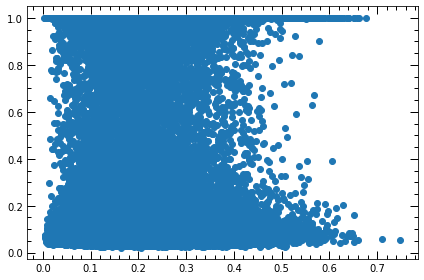

In [391]:
plt.scatter(x_p, y_prob)

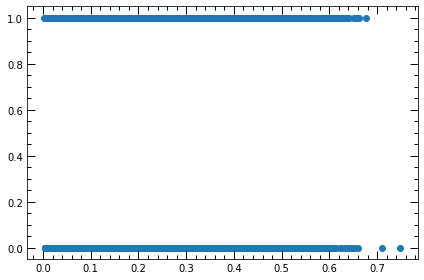

In [392]:
plt.scatter(x_p, yc)

In [433]:
res = 64
step = (np.amax(x_p)-np.amin(x_p))/res
xs_mean = []
for i in range(res):
    xs_mean.append(np.amin(x_p) + step*i)
def wbin(p):
    idx = math.trunc((p-np.amin(x_p))/step)
    if idx ==64:
        print(p)
        return 63
    else:
        return idx


In [423]:
bins = []
for i in range(res):
    bins.append([])
    
for p, y in zip(x_p, y_prob):
    if wbin(p) < 0 or wbin(p) >63:
        print(wbin(p))
    bins[wbin(p)].append(y)

0.7475913498438573
0.7475913498438573
0.7475913498438573


In [431]:
mean = []
for bi in bins:
    xs = []
    for x in bi:
        xs.append(x)
    xs = np.array(xs)
    mean.append(xs.mean())

<ipython-input-431-b96e814b1cd1>:7: RuntimeWarning: Mean of empty slice.
  mean.append(xs.mean())


(334438,)

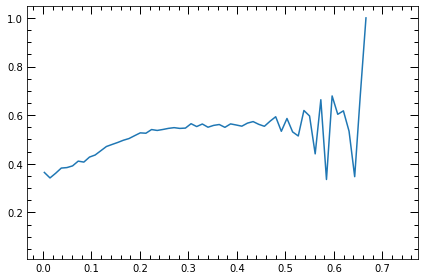

In [435]:
plt.plot(xs_mean, mean)